1. How do prices influence amount of bookings?

2. In which areas are the most accomodations located? (neighbourhood)

3. Which accomodations have the best review_scores and how do they go together with bookings?

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# configures Pandas to adopt the behavior planned for future releases, where automatic and silent data type downcasting 
# (converting data types to a smaller or more efficient type without explicit instruction) is disabled.
pd.set_option('future.no_silent_downcasting', True)

#read data
s_reviews = 'Seattle/reviews.csv'
s_listings = 'Seattle/listings.csv'
s_calendar = 'Seattle/calendar.csv'

df_s_reviews = pd.read_csv(s_reviews)
df_s_listings = pd.read_csv(s_listings)
df_s_calendar = pd.read_csv(s_calendar)

#### 1.How do prices influence amounts of bookings?

In [44]:
# Data Exploration

#read booking data
df_s_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [45]:
# replace 'available' colum values with boolean values
df_s_calendar['available'] = df_s_calendar['available'].replace({'t': True, 'f': False})
df_s_calendar#.head()

,listing_id,date,available,price
0,241032,2016-01-04,True,$85.00
1,241032,2016-01-05,True,$85.00
2,241032,2016-01-06,False,NaN
3,241032,2016-01-07,False,NaN
4,241032,2016-01-08,False,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,False,NaN
1393566,10208623,2016-12-30,False,NaN
1393567,10208623,2016-12-31,False,NaN
1393568,10208623,2017-01-01,False,NaN


In [46]:
# compare booked vs. non-booked values

# count number of availabe(non-booked) entries per listing_id as well as total amount of entries per listing_id
df_grouped = df_s_calendar.groupby('listing_id')['available'].agg(['sum', 'count'])
df_grouped = df_grouped.rename(columns={'sum': 'non_booked', 'count': 'entries_per_listing_id'})
print(df_grouped.head())

# calculate number of not avalable (booked) entries per listing_id
df_grouped['booked'] = df_grouped['entries_per_listing_id'] - df_grouped['non_booked']

df_sorted = df_grouped.sort_values(by='booked', ascending=False)
df_sorted


           non_booked  entries_per_listing_id
listing_id                                   
3335              309                     365
4291              365                     365
5682              309                     365
6606              365                     365
7369               53                     365


,non_booked,entries_per_listing_id,booked
listing_id,,,
5308339,0,365,365
4211836,0,365,365
9939359,0,365,365
2426152,0,365,365
4030600,0,365,365
...,...,...,...
3720731,365,365,0
3726391,365,365,0
1317919,365,365,0


In [47]:
# just show columnnames of listings
df_s_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [48]:
# select features
selected_featues = ['id', 'price']
df = df_s_listings[selected_featues]
'''
Using copy(): If you’re working with a DataFrame that is a slice of another DataFrame, it’s a good practice 
to use df = df.copy() before making modifications. This ensures you are working with a separate copy.
'''
df = df.copy()

In [49]:
# check whether NaN values exist in the column
df['price'].isnull().any()  

False

In [50]:
type(df['price'][0])

# create prise_int column

df['price_short'] = df['price'].apply(lambda x: x[1:-3])
df['price_short'] = df['price_short'].str.replace(',', '').astype(int)
df

,id,price,price_short
0,241032,$85.00,85
1,953595,$150.00,150
2,3308979,$975.00,975
3,7421966,$100.00,100
4,278830,$450.00,450
...,...,...,...
3813,8101950,$359.00,359
3814,8902327,$79.00,79
3815,10267360,$93.00,93
3816,9604740,$99.00,99


In [51]:
type(df['price_short'][0])

# create price_category column

#Define the bins and labels for price categories

bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, float('inf')]  # Define the ranges
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500', '501-550', '551-600', '601-650', '651+']

# Create the price_category column
df['price_category'] = pd.cut(df['price_short'], bins=bins, labels=labels, right=False)
df

,id,price,price_short,price_category
0,241032,$85.00,85,51-100
1,953595,$150.00,150,151-200
2,3308979,$975.00,975,651+
3,7421966,$100.00,100,101-150
4,278830,$450.00,450,451-500
...,...,...,...,...
3813,8101950,$359.00,359,351-400
3814,8902327,$79.00,79,51-100
3815,10267360,$93.00,93,51-100
3816,9604740,$99.00,99,51-100


In [52]:
# combine bookings with listings features
'''
When using pd.merge, it is generally not necessary to create a copy of the DataFrames before merging, 
as the merge function itself creates a new DataFrame. The original DataFrames remain unchanged after the merge operation.
'''
#df_merged = pd.merge(df_left, df_right, left_on='key_left', right_on='key_right', how='left')

df_merged = pd.merge(df_sorted, df, left_on='listing_id', right_on='id').sort_values('price_short')

df_merged

,non_booked,entries_per_listing_id,booked,id,price,price_short,price_category
2548,351,365,14,10310373,$20.00,20,0-50
303,34,365,331,10248139,$22.00,22,0-50
1940,312,365,53,7411863,$25.00,25,0-50
358,47,365,318,10012724,$25.00,25,0-50
2746,357,365,8,4701205,$25.00,25,0-50
...,...,...,...,...,...,...,...
2995,362,365,3,4464824,$899.00,899,651+
3629,365,365,0,2720963,$950.00,950,651+
1471,220,365,145,3308979,$975.00,975,651+
46,0,365,365,3345341,$999.00,999,651+


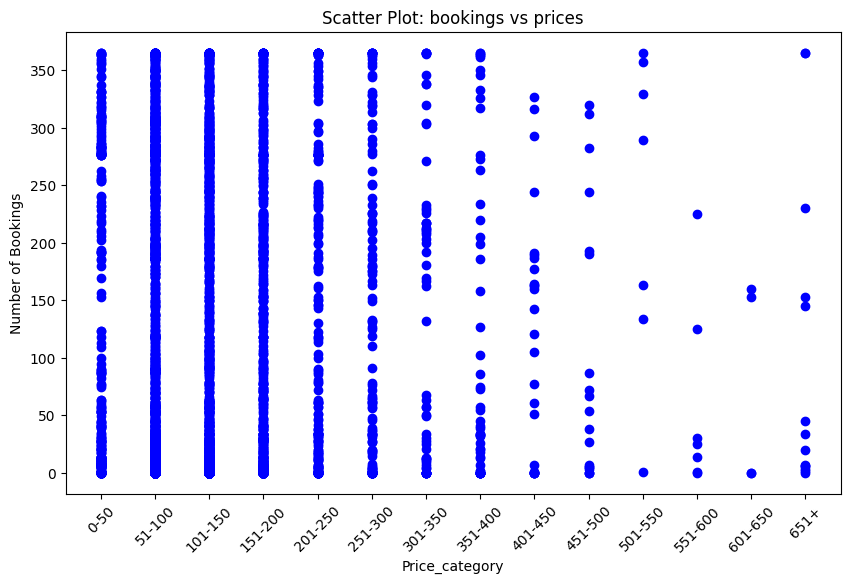

In [53]:

plt.figure(figsize=(10, 6))
plt.scatter(df_merged['price_category'], df_merged['booked'], color='blue', )
plt.xticks(rotation=45)
plt.xlabel('Price_category')
plt.ylabel('Number of Bookings')
plt.title('Scatter Plot: bookings vs prices')
# Save the plot to a file
plt.savefig('booking_vs_prices.png')
plt.show()

#### 2. In which areas are the most accomodations located? (neighbourhood)

In [54]:
df_listings_areas = df_s_listings[['neighbourhood', 'id']].groupby('neighbourhood').agg('count').sort_values('id')
df_listings_areas

,id
neighbourhood,
North College Park,1
Roxhill,1
Fairmount Park,1
Pike Market,2
South Park,2
...,...
Queen Anne,187
Minor,192
Belltown,204


In [55]:
# select listings most concentrated in certain neighbourhoods
df_neighbourhood_counts = df_listings_areas[df_listings_areas['id'] > 100]
df_neighbourhood_counts

,id
neighbourhood,
First Hill,105
University District,107
Wallingford,143
Fremont,148
Queen Anne,187
Minor,192
Belltown,204
Ballard,213
Capitol Hill,351


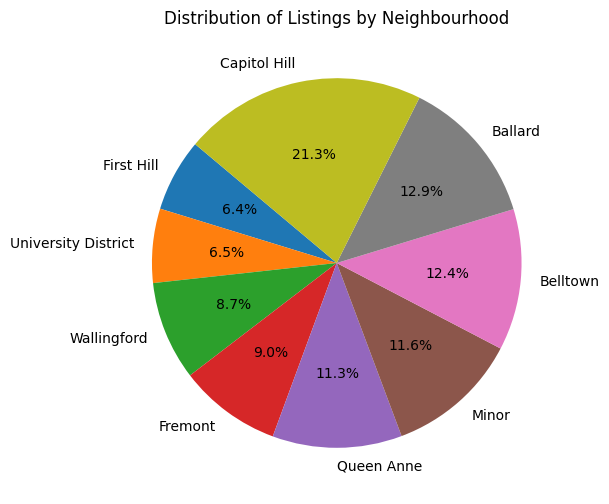

In [56]:
# Create the pie chart
plt.figure(figsize=(8, 6))
#autopct='%1.1f%%': This will display the percentage of each pie slice with one decimal place.
#startangle=140: This rotates the pie chart to start at an angle of 140 degrees for better visualization.
plt.pie(df_neighbourhood_counts['id'], labels=df_neighbourhood_counts.index, autopct='%1.1f%%', startangle=140)


# Add a title
plt.title('Distribution of Accomodations by Neighbourhood')

# Save the plot to a file
plt.savefig('distribution_of_accomodations.png')

# Display the pie chart
plt.show()

#### 3. Which accomodations have the best review_scores and how do they go together with bookings.

In [57]:
# read listings_review scored
df_ratings = df_s_listings[['id', 'review_scores_rating']].dropna().sort_values('review_scores_rating', ascending=False)
df_ratings


,id,review_scores_rating
1892,3402376,100.0
1765,6002165,100.0
1801,7499506,100.0
1799,3124961,100.0
1792,7563243,100.0
...,...,...
1162,9151865,40.0
2320,8474294,40.0
1666,9151374,40.0
3148,5639238,40.0


In [58]:
#df_ratings_bookings = pd.merge(df_ratings, df, left_on='id', right_on='id').sort_values('review_scores_rating')
#df_ratings_bookings
df_merged_2 = pd.merge(df_merged, df_ratings, left_on='id', right_on='id').sort_values('review_scores_rating')
df_merged_2

,non_booked,entries_per_listing_id,booked,id,price,price_short,price_category,review_scores_rating
2136,57,365,308,9183838,$130.00,130,101-150,20.0
1762,270,365,95,5639238,$110.00,110,101-150,40.0
1013,8,365,357,8474294,$81.00,81,51-100,40.0
1655,332,365,33,9151374,$105.00,105,101-150,40.0
845,66,365,299,9151865,$75.00,75,51-100,40.0
...,...,...,...,...,...,...,...,...
1753,179,365,186,6558980,$110.00,110,101-150,100.0
1748,364,365,1,2158992,$110.00,110,101-150,100.0
1730,359,365,6,8153673,$110.00,110,101-150,100.0
1321,288,365,77,9866984,$95.00,95,51-100,100.0


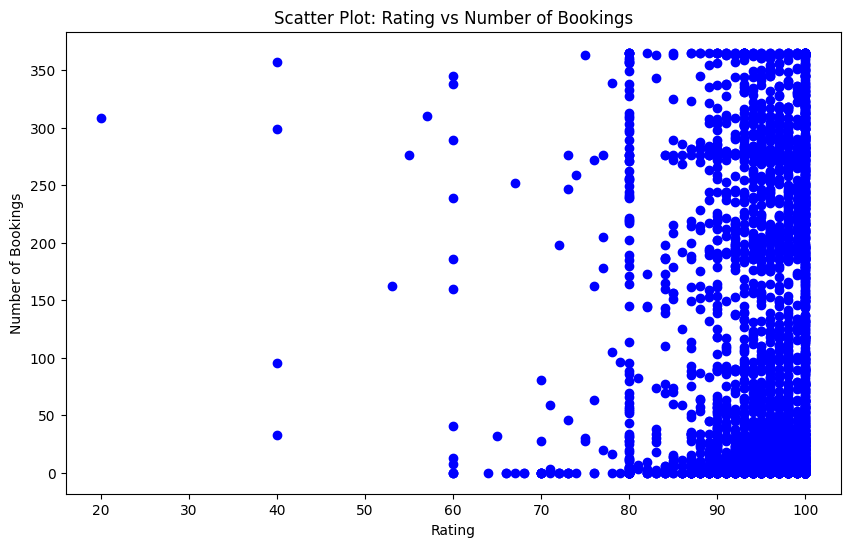

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(df_merged_2['review_scores_rating'], df_merged_2['booked'], color='blue')
plt.xlabel('Rating')
plt.ylabel('Number of Bookings')
plt.title('Scatter Plot: Rating vs Number of Bookings')
# Save the plot to a file
plt.savefig('rating_vs_bookings.png')
plt.show()